### AirBnb
#### Analyse de données en vue de la mise en place d'une IA

#### Traitement du dataframe

In [53]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

Collecte des données

In [54]:
data_march = pd.read_csv(r'C:\Users\33698\Downloads\listings(1).csv\listings1.csv')
data_december = pd.read_csv(r'C:\Users\33698\Downloads\listings(2).csv\listings.csv')
data_september = pd.read_csv(r'C:\Users\33698\Downloads\listings(3).csv\listings.csv')

Prétraitement des données

In [55]:
# Concaténation des données Paris
data_march['month'] = 0
data_december['month'] = 1
data_september['month'] = 2
dfs = [data_march, data_december, data_september]
df = pd.concat(dfs)
df['month'].head()

0    0
1    0
2    0
3    0
4    0
Name: month, dtype: int64

In [56]:
# Nom des colonnes
cols = list(df.columns.values)
print(cols)
# Nombre de colonnes
print("Il y a ",len(cols), "colonnes")

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [57]:
# Sélection des colonnes pertinentes
columns_to_keep = [
    'name', 'price', 'month', 'latitude', 'longitude', 'property_type',
    'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'host_is_superhost'
]
df = df[columns_to_keep]

In [58]:
# Identifier les données manquantes
df.isnull().sum()

name                                0
price                           30701
month                               0
latitude                            0
longitude                           0
property_type                       0
accommodates                        0
bathrooms                      165709
bedrooms                        96831
beds                            24978
number_of_reviews                   0
review_scores_rating            58129
review_scores_accuracy          58677
review_scores_cleanliness       58669
review_scores_checkin           58706
review_scores_communication     58674
review_scores_location          58701
review_scores_value             58713
host_is_superhost                1155
dtype: int64

In [59]:
# Maintenant on va remplacer/modifier les colonnes ayant des valeurs nuls
cols_evaluations = [
  'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
  'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
  'review_scores_value'
]
for col in cols_evaluations:
    df[col].fillna(df[col].mean(), inplace=True)

###

df['host_is_superhost'].fillna(df['host_is_superhost'].mode()[0], inplace=True)
df.head()

,name,price,month,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost
0,zen and calm,$250.00,0,48.83191,2.31870,Entire rental unit,2,1.0,1.0,1.0,4,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f
1,studio charme Haut Marais PARIS,$140.00,0,48.86652,2.36261,Entire rental unit,2,1.0,0.0,1.0,106,4.68,4.72,4.59,4.87,4.89,4.95,4.74,t
2,Your perfect Paris studio on Île Saint-Louis,$107.00,0,48.85247,2.35835,Entire rental unit,2,1.0,0.0,1.0,393,4.60,4.63,4.57,4.81,4.84,4.96,4.58,f
3,Big appartment with view 4 people,$200.00,0,48.87623,2.36869,Entire rental unit,4,1.0,1.0,1.0,78,4.56,4.74,4.37,4.82,4.79,4.65,4.48,f
4,COSY INDEPENDENT ROOM IN CENTRAL PARIS,NaN,0,48.87068,2.34460,Private room in guest suite,2,NaN,NaN,NaN,126,4.86,4.93,4.82,4.96,4.97,4.94,4.82,t


In [60]:
###
# Extraction des informations à partir du name pour les colonnes bedrooms, beds et bathrooms
df_expanded = df['name'].str.extract(
    r'(\d+)\s*bedroom|bedrooms.*?(\d+)\s*bed|beds.*?(\d+)\s*bath|bathrooms',
    flags=re.IGNORECASE
)
df_expanded.columns = ['bedrooms', 'beds', 'bathrooms']
df_expanded = df_expanded.apply(pd.to_numeric, errors='coerce')

df['bedrooms'].fillna(df_expanded['bedrooms'], inplace=True)
df['beds'].fillna(df_expanded['beds'], inplace=True)
df['bathrooms'].fillna(df_expanded['bathrooms'], inplace=True)

median_bathrooms = df['bathrooms'].median()
median_bedrooms = df['bedrooms'].median()
median_beds = df['beds'].median()

df['bathrooms'].fillna(median_bathrooms, inplace=True)
df['bedrooms'].fillna(median_bedrooms, inplace=True)
df['beds'].fillna(median_beds, inplace=True)

###
# Transformation du prix en integer, et lui attribuer la median lorsque la valeur est null
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')
df['price'].replace([np.inf, -np.inf], np.nan, inplace=True)
median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)
df['price'] = df['price'].astype(float).astype(pd.Int64Dtype(), errors='ignore')

# Vérifions 👀
df.isnull().sum()

name                           0
price                          0
month                          0
latitude                       0
longitude                      0
property_type                  0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
host_is_superhost              0
dtype: int64

In [61]:
# transformation du type de la colonne host_is_superhost
df['host_is_superhost'] = df['host_is_superhost'].map({'f': 0, 't': 1})
df.dtypes

name                            object
price                            Int64
month                            int64
latitude                       float64
longitude                      float64
property_type                   object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
host_is_superhost                int64
dtype: object

In [62]:
# Suppression des doublons
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())


181
0


In [63]:
# Supprimer les extremes - pour eviter de fausser l'IA
df = df.loc[(df['price'] >= 80) & (df['price'] <= 400)]
df.price.value_counts()

price
135    31838
100     5761
150     5319
120     5132
90      4395
       ...  
396       35
372       35
362       34
382       28
388       28
Name: count, Length: 321, dtype: Int64

In [64]:
print(f'Lignes: {df.shape[0]}')

Lignes: 170700


#### IA

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

numeric_columns = df.select_dtypes(exclude='object').columns
df_selected = df[numeric_columns]
X = df_selected.drop('price', axis=1)
y = df_selected['price']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=1/3, random_state=1
)

R² sur les données de test : 0.18968925219389465


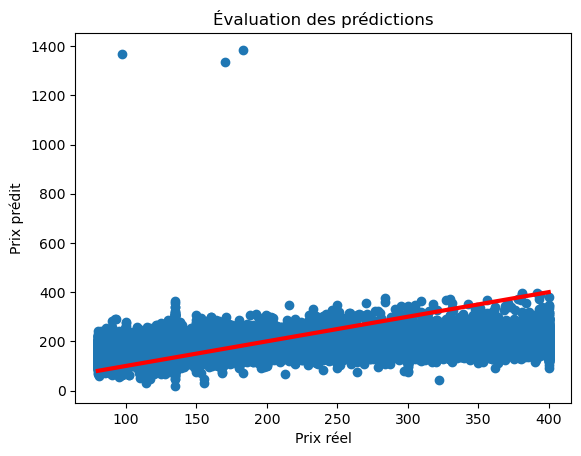

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_pred = r2_score(y_test, y_pred)
print(f"R² sur les données de test : {r2_pred}")

plt.scatter(y_test, y_pred)
plt.xlabel('Prix réel')
plt.ylabel('Prix prédit')
plt.title('Évaluation des prédictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=3)
plt.show()

#### Data Viz

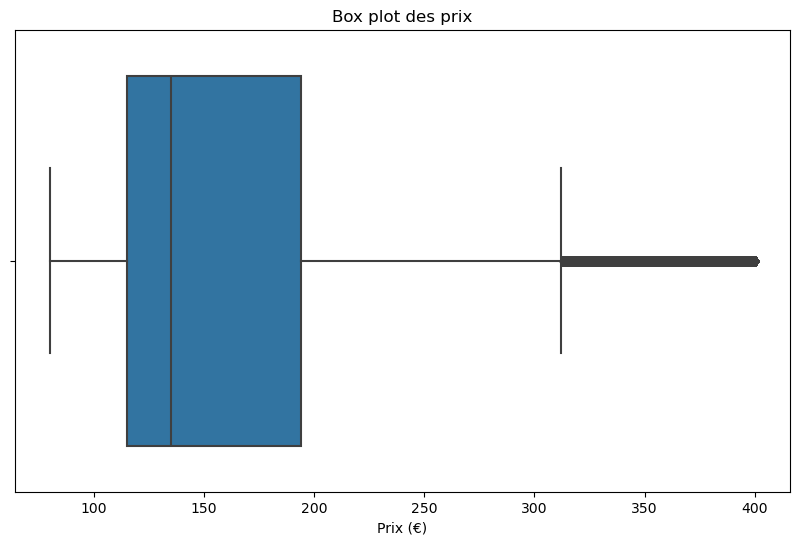

In [67]:
# Créer une boîte à moustaches
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.price)
plt.title('Box plot des prix')
plt.xlabel('Prix (€)')
plt.show()

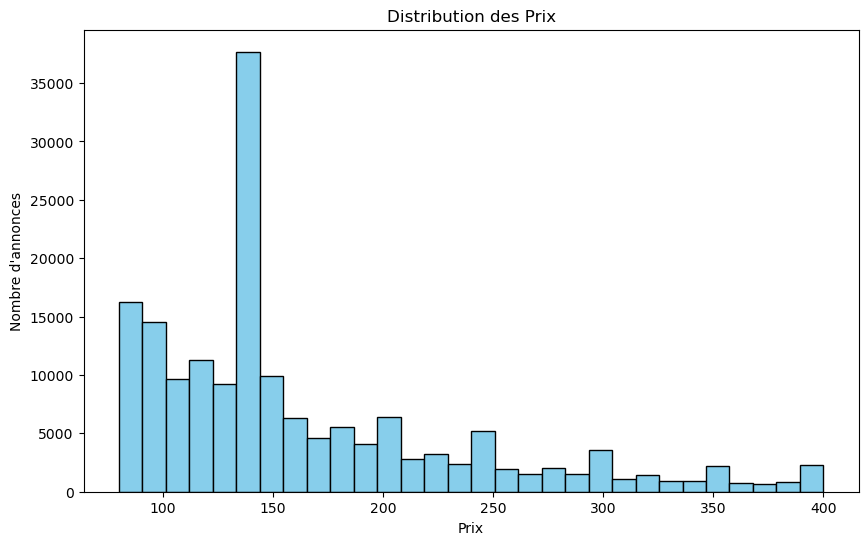

In [68]:
# Histogramme des prix
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution des Prix')
plt.xlabel('Prix')
plt.ylabel('Nombre d\'annonces')
plt.show()

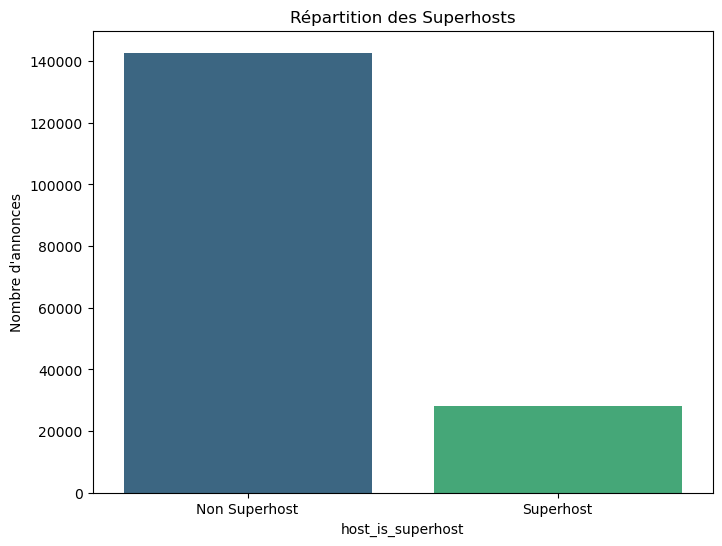

In [69]:
# La répartition des superhosts
superhost_labels = {'1': 'Superhost', '0': 'Non Superhost'}
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='host_is_superhost', data=df, palette='viridis')

ax.set_xticklabels([superhost_labels[tick.get_text()] for tick in ax.get_xticklabels()])

plt.title('Répartition des Superhosts')
plt.ylabel('Nombre d\'annonces')
plt.show()

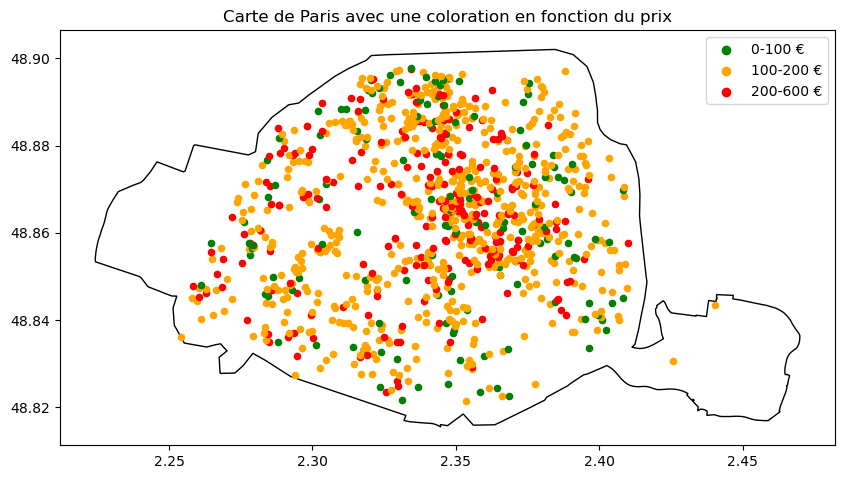

In [70]:
import random
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point


df_paris = df
df_sample = df_paris.sample(n=1000)

geometry = [Point(xy) for xy in zip(df_sample['longitude'], df_sample['latitude'])]
geo_df = gpd.GeoDataFrame(df_sample, geometry=geometry, crs='EPSG:4326')

paris = ox.geocode_to_gdf("Paris, France")
paris = paris.to_crs(geo_df.crs)

merged = gpd.sjoin(paris, geo_df, predicate='contains')

price_ranges = [(0, 100), (100, 200), (200, 600)]
colors = ['green', 'orange', 'red']

def get_color(price):
    for i, (lower, upper) in enumerate(price_ranges):
        if lower <= price < upper:
            return colors[i]

fig, ax = plt.subplots(figsize=(10, 10))
paris.plot(ax=ax, edgecolor='black', color='white')

for index, row in merged.iterrows():
    color = get_color(row['price'])
    plt.scatter(row['longitude'], row['latitude'], color=color, s=20)

for i, (lower, upper) in enumerate(price_ranges):
    plt.scatter([], [], color=colors[i], label=f'{lower}-{upper} €')

plt.title('Carte de Paris avec une coloration en fonction du prix')
plt.legend()
plt.show()